# Introduction

## This dataset contains the sales of games from 1985 till now , I answered some questions like :
### what are the genres that most revenues ?
### What are the revenues per years ?
### what are the years that made huge success in sales ?
### what was the revenue of the top companies ?
### what was the market share in 2013 ?
### what was the market share in 2015 ?
### What are the sales over years for the biggest companies ?¶


In [213]:
#importing libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [214]:
data=pd.read_csv('vgsales.csv')     #loading the dataset

In [215]:
data.head()      #display the first 5 rows of the data 

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [216]:
data.describe()  #get the summary statistics of the data 

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [217]:
data.isnull().sum()   #checking for the null data 

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [218]:
data.shape  #number of rows and columns

(16598, 11)

In [219]:
data.Rank.nunique()    #discovering the unique numbers in Rank column

16598

In [195]:
""" I choose to drop the rank column as it's not an identifier for anything"""

" I choose to drop the rank column as it's not an identifier for anything"

In [220]:
data.drop(['Rank'],axis=1,inplace=True)  #droping the column

In [13]:
data.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [221]:
data[data.isna().any(axis=1)]  #visualising the table containg only null rows 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
624,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.00,0.21,2.48
649,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Konami Digital Entertainment,2.15,0.18,0.00,0.07,2.39
652,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,1.54,0.63,0.00,0.22,2.39
711,Call of Duty 3,Wii,NaN,Shooter,Activision,1.19,0.84,0.00,0.23,2.26
782,Rock Band,Wii,NaN,Misc,MTV Games,1.35,0.56,0.00,0.20,2.11


In [222]:
data.dropna(axis=0,inplace=True)   # dropping na rows 

In [223]:
data.shape[0]

16291

In [224]:
data.isnull().sum()   #checking for null values to make sure everything is clear 

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

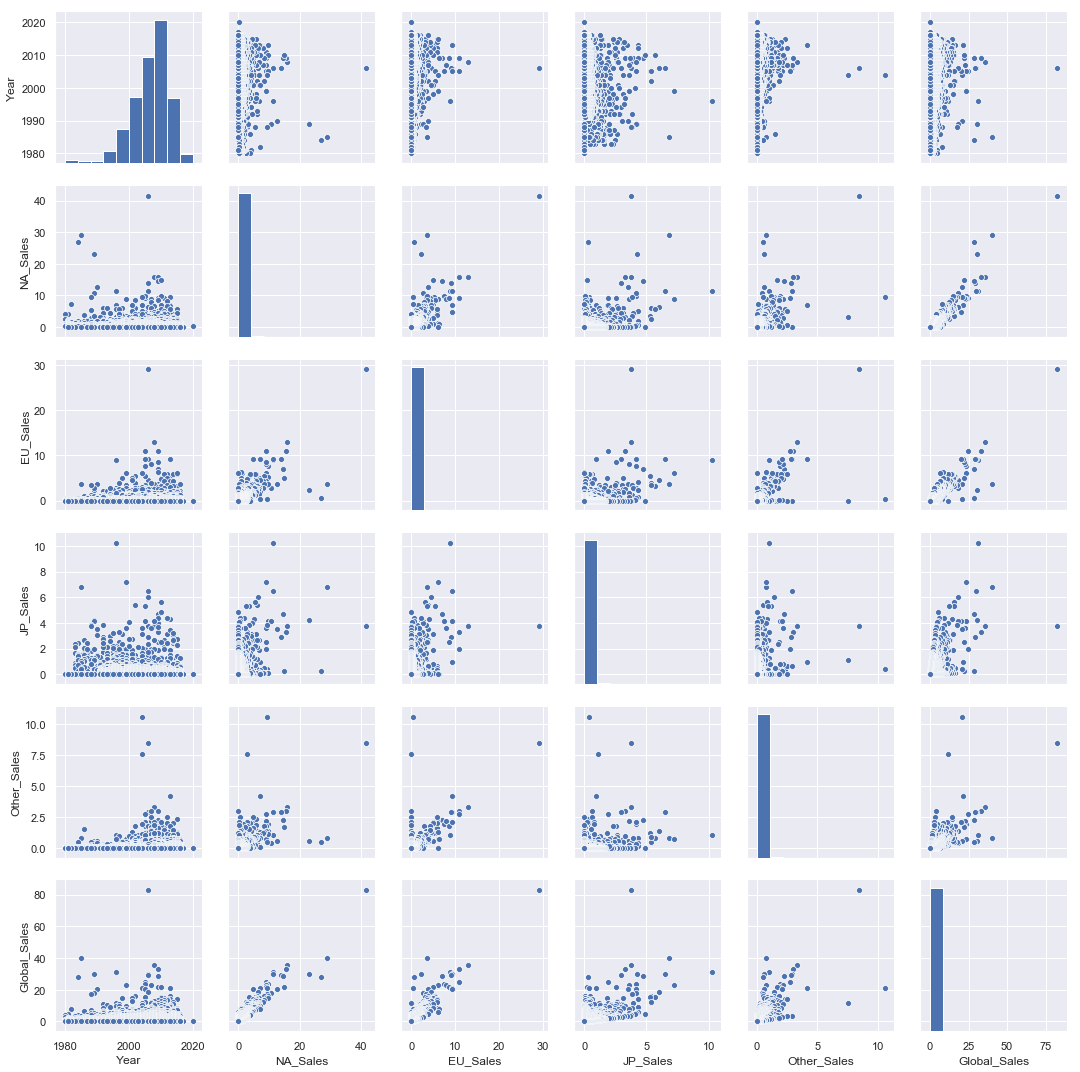

In [225]:
sns.pairplot(data)    #checking for the correlation between the variables 

In [226]:
data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


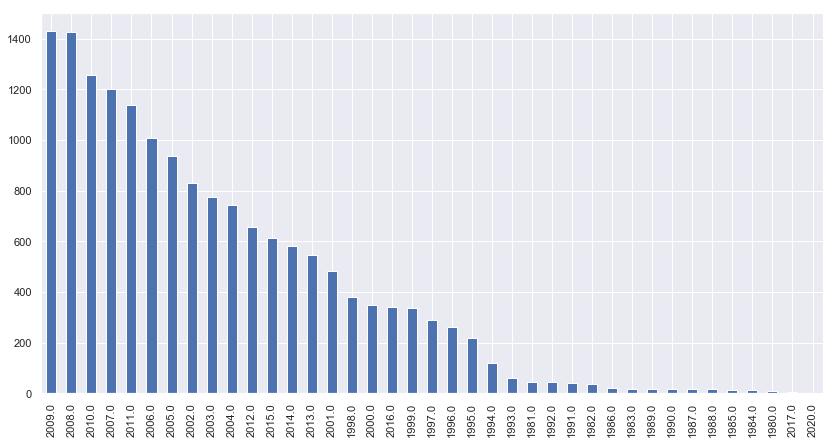

In [227]:
plt.figure(figsize=(14,7))
data.Year.value_counts().plot(kind='bar')    #distribution of the years in the dataset

In [198]:
""" There are not enough data to compare after 2015 , so i'll remove the years after 2015 """

" There are not enough data to compare after 2015 , so i'll remove the years after 2015 "

In [228]:
data=data[data['Year']<=2016]   

### what are the genres that most revenues ?

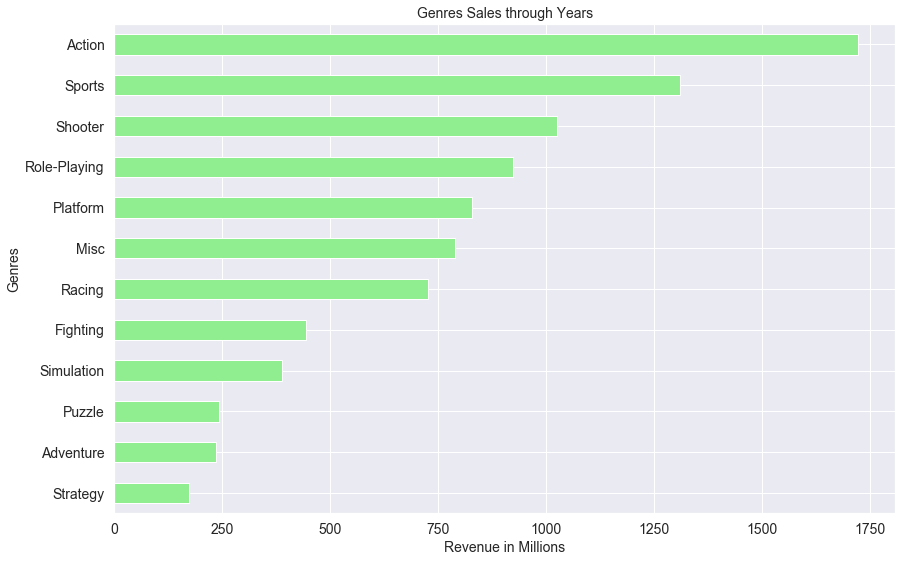

In [229]:
plt.figure(figsize=(14,9))
data.groupby('Genre')['Global_Sales'].sum().sort_values().plot(kind='barh',color='lightgreen')
plt.xticks(fontsize=14)
plt.xlabel('Revenue in Millions',fontsize=14)
plt.ylabel('Genres',fontsize=14)
plt.yticks(fontsize=14)
plt.title('Genres Sales through Years',fontsize=14)
plt.show()

In [199]:
""" Action , sports ,shooter are the categories that make most sales , companies must notice that """

' Action , sports ,shooter are the categories that make most sales , companies must notice that '

### What are the revenues per years ?

Text(0.5, 1.0, 'Revenues for all companies')

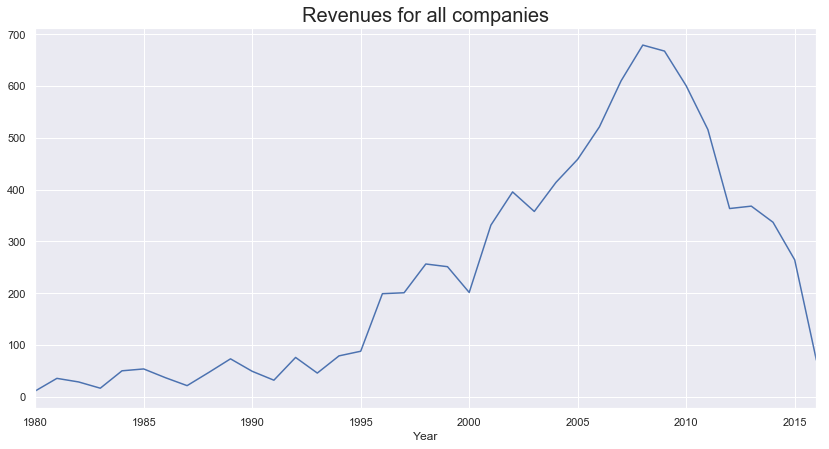

In [230]:
plt.figure(figsize=(14,7))
data.groupby('Year')['Global_Sales'].sum().plot()
plt.title('Revenues for all companies',fontsize=20)


In [200]:
""" most of the sales are between 2003 & 2015 """

' most of the sales are between 2003 & 2015 '

In [201]:
""" but , maybe that's because of the increasing in the games in that period"""

" but , maybe that's because of the increasing in the games in that period"

### what are the years that made huge success in sales 

Text(0.5, 1.0, 'Distribution of most years in sales ')

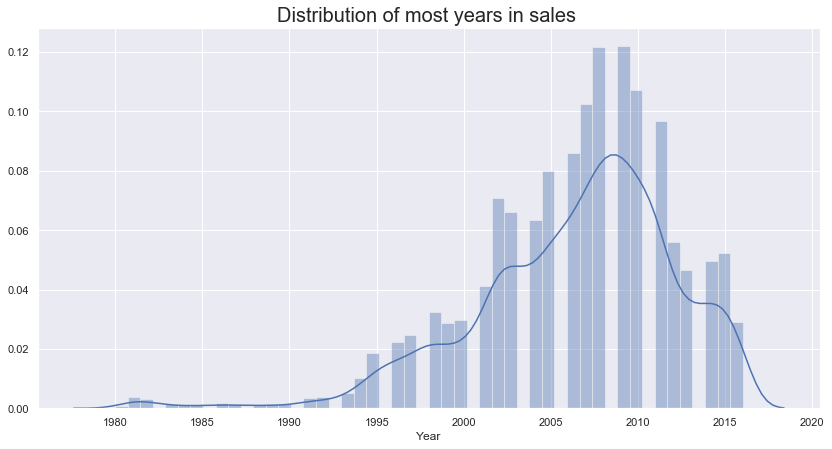

In [231]:
plt.figure(figsize=(14,7))
sns.distplot(data['Year'])
plt.title('Distribution of most years in sales ',fontsize=20)

In [202]:
""" Yes , most of the games are between that period"""

' Yes , most of the games are between that period'

### correlation between the variables 

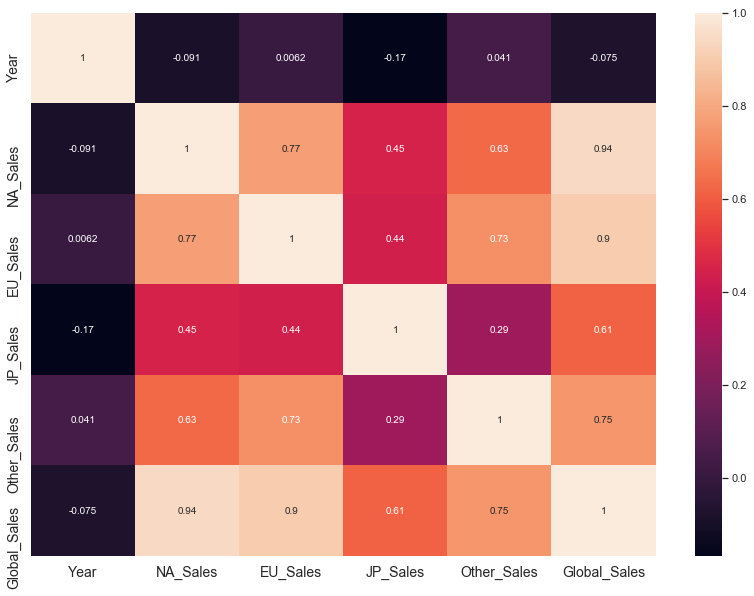

In [232]:
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(),annot=True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [203]:
""" Europe , North America have the most correlation with the sales """

' Europe , North America have the most correlation with the sales '

### what was the revenue of the top companies ?

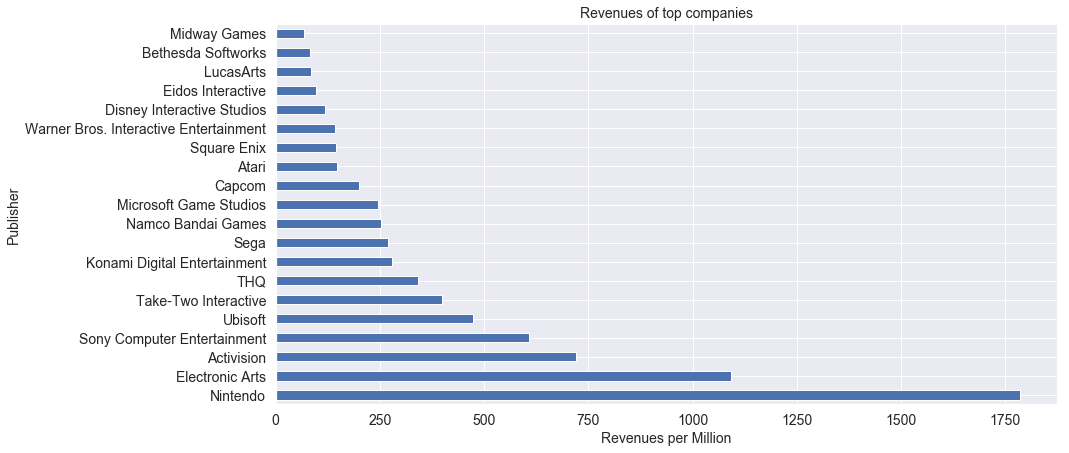

In [233]:
plt.figure(figsize=(14,7))
data.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)[:20].plot(kind='barh')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Revenues of top companies',fontsize=14)
plt.xlabel('Revenues per Million',fontsize=14)
plt.ylabel('Publisher',fontsize=14)
plt.show()

In [204]:
""" Nintendo ,EA, Activision are the real sharks of the marketshare !"""

' Nintendo ,EA, Activision are the real sharks of the marketshare !'

In [235]:
data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### what was the market share in 2007 ?

(array([], dtype=float64), <a list of 0 Text yticklabel objects>)

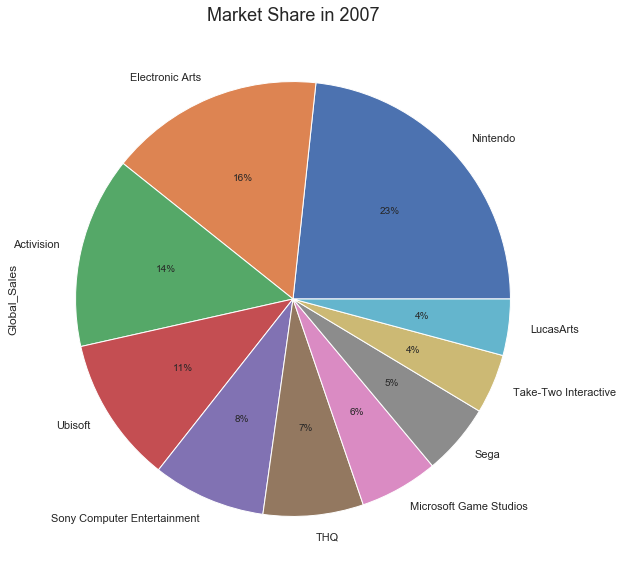

In [234]:
plt.figure(figsize=(14,10))
data[data['Year']==2007].groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)[:10].plot(kind='Pie',autopct='%1.0f%%')
plt.title('Market Share in 2007',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [205]:
"""1-Nintendo
   2-EA
   3-Activision are the top 3 in 2007
"""

'1-Nintendo\n   2-EA\n   3-Activision are the top 3 in 2007\n'

### what was the market share in 2010 ?

(array([], dtype=float64), <a list of 0 Text yticklabel objects>)

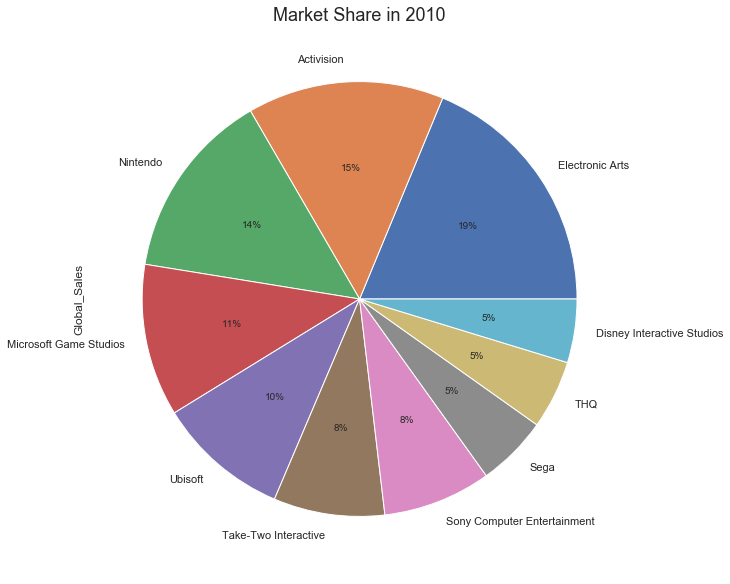

In [236]:
plt.figure(figsize=(14,10))
data[data['Year']==2010].groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)[:10].plot(kind='Pie',autopct='%1.0f%%')
plt.title('Market Share in 2010',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [206]:
"""1-EA
   2-Activision
   3-Nintendo are the top 3 in 2010
"""

'1-EA\n   2-Activision\n   3-Nintendo are the top 3 in 2010\n'

### what was the market share in 2013 ?

(array([], dtype=float64), <a list of 0 Text yticklabel objects>)

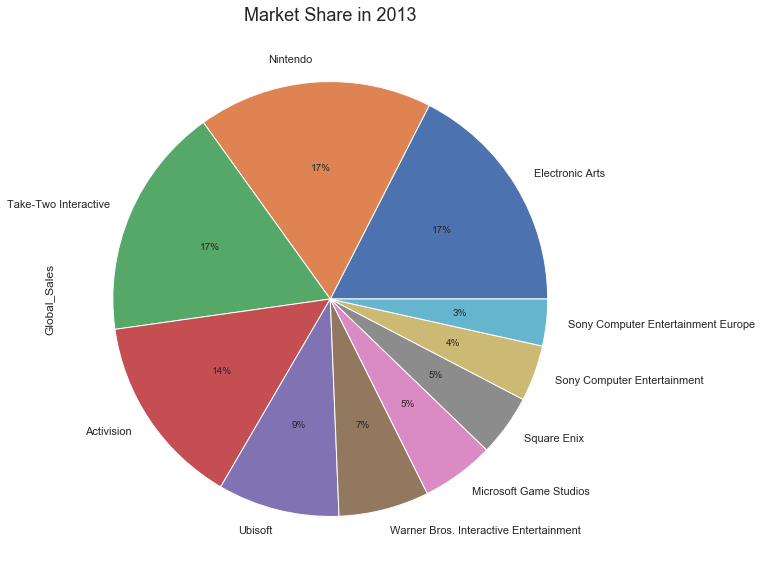

In [237]:
plt.figure(figsize=(14,10))
data[data['Year']==2013].groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)[:10].plot(kind='Pie',autopct='%1.0f%%')
plt.title('Market Share in 2013',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [207]:
"""Nintendo
   EA
   Activision are equally share the market in 2013
"""

'Nintendo\n   EA\n   Activision are equally share the market in 2013\n'

### what was the market share in 2015 ?

(array([], dtype=float64), <a list of 0 Text yticklabel objects>)

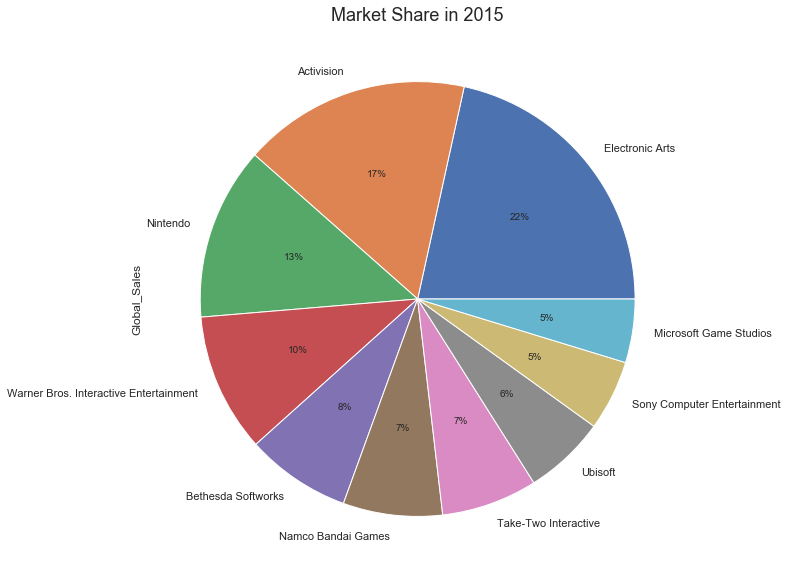

In [238]:
plt.figure(figsize=(14,10))
data[data['Year']==2015].groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)[:10].plot(kind='Pie',autopct='%1.0f%%')
plt.title('Market Share in 2015',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [208]:
"""1-EA
   2-Activision
   3-Nintendo are the top 3 in 2015
"""

'1-EA\n   2-Activision\n   3-Nintendo are the top 3 in 2015\n'

### What are the sales over years for the biggest companies ?

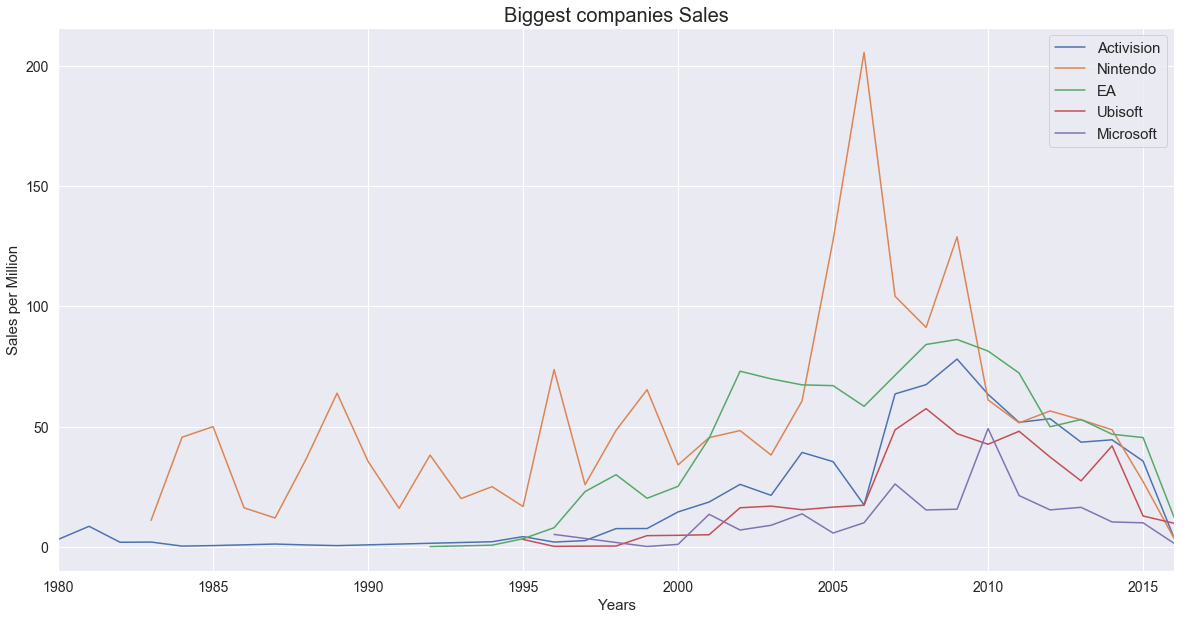

In [239]:
plt.figure(figsize=(20,10))
data[data['Publisher']=='Activision'].groupby('Year')['Global_Sales'].sum().plot(label='Activision')
data[data['Publisher']=='Nintendo'].groupby('Year')['Global_Sales'].sum().plot(label='Nintendo')
data[data['Publisher']=='Electronic Arts'].groupby('Year')['Global_Sales'].sum().plot(label='EA')
data[data['Publisher']=='Ubisoft'].groupby('Year')['Global_Sales'].sum().plot(label='Ubisoft')
data[data['Publisher']=='Microsoft Game Studios'].groupby('Year')['Global_Sales'].sum().plot(label='Microsoft')
plt.legend(fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Sales per Million',fontsize=15)
plt.xlabel('Years',fontsize=15)
plt.title('Biggest companies Sales',fontsize=20)
plt.show()

In [209]:
""" Nintendo peak was in 2007"""

' Nintendo peak was in 2007'

In [180]:
data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### What are the sales per regions through years ?

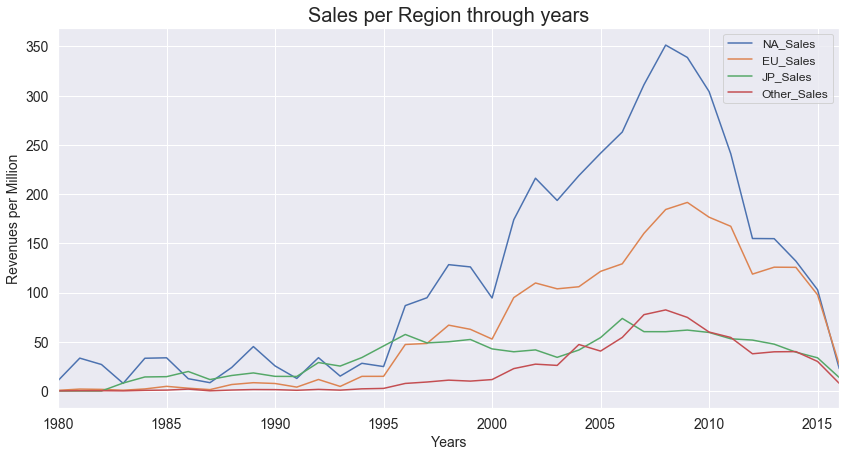

In [240]:
plt.figure(figsize=(14,7))
data.groupby('Year')['NA_Sales'].sum().plot()
data.groupby('Year')['EU_Sales'].sum().plot()
data.groupby('Year')['JP_Sales'].sum().plot()
data.groupby('Year')['Other_Sales'].sum().plot()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Years',fontsize=14)
plt.ylabel('Revenues per Million',fontsize=14)
plt.legend(fontsize=12)
plt.title('Sales per Region through years',fontsize=20)
plt.show()

In [210]:
""" North America youth are the most users of consoles """


' North America youth are the most users of consoles '